In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
csv_data = pd.read_csv("sample_sales_data(csv).csv")
excel_data = pd.read_excel("sample_sales_data(excel).xlsx")
json_data = pd.read_json("sample_sales_data(json).json")

In [16]:
print("CSV Data Info:")
print(csv_data.info())
print("\nExcel Data Info:")
print(excel_data.info())
print("\nJSON Data Info:")
print(json_data.info())

print(csv_data.head())
print(excel_data.head())
print(json_data.head())

CSV Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          5 non-null      int64  
 1   ProductID        5 non-null      int64  
 2   CustomerID       5 non-null      int64  
 3   OrderDate        5 non-null      object 
 4   ProductCategory  5 non-null      object 
 5   Quantity         5 non-null      int64  
 6   UnitPrice        5 non-null      float64
dtypes: float64(1), int64(4), object(2)
memory usage: 412.0+ bytes
None

Excel Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          5 non-null      int64  
 1   ProductID        5 non-null      int64  
 2   CustomerID       5 non-null      int64  
 3   OrderDate        5 non-null      object 
 4   

In [17]:
csv_data = csv_data.drop_duplicates()
excel_data = excel_data.drop_duplicates()
json_data = json_data.drop_duplicates()

csv_data['Quantity'].fillna(0, inplace=True)
excel_data['Quantity'].fillna(0, inplace=True)
json_data['Quantity'].fillna(0, inplace=True)

In [18]:
unified_data = pd.concat([csv_data, excel_data, json_data], ignore_index=True)

In [19]:
unified_data['TotalSales'] = unified_data['Quantity'] * unified_data['UnitPrice']

In [20]:
print(unified_data.describe())

          OrderID  ProductID  CustomerID  Quantity   UnitPrice  TotalSales
count    15.00000   15.00000    15.00000  15.00000   15.000000   15.000000
mean   1003.00000  103.00000  2003.00000   3.00000   97.190000  193.970000
std       1.46385    1.46385     1.46385   1.46385  109.463105  140.652765
min    1001.00000  101.00000  2001.00000   1.00000   15.990000   39.980000
25%    1002.00000  102.00000  2002.00000   2.00000   19.990000   79.950000
50%    1003.00000  103.00000  2003.00000   3.00000   49.990000  149.970000
75%    1004.00000  104.00000  2004.00000   4.00000   99.990000  299.990000
max    1005.00000  105.00000  2005.00000   5.00000  299.990000  399.960000


In [21]:
total_sales = unified_data['TotalSales'].sum()
avg_order_value = unified_data['TotalSales'].mean()
sales_by_category = unified_data.groupby('ProductCategory')['TotalSales'].sum()

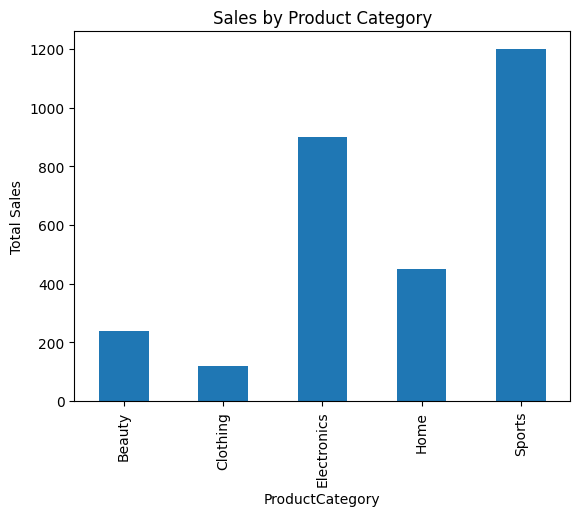

In [23]:
sales_by_category.plot(kind='bar', title='Sales by Product Category')
plt.ylabel('Total Sales')
plt.show()

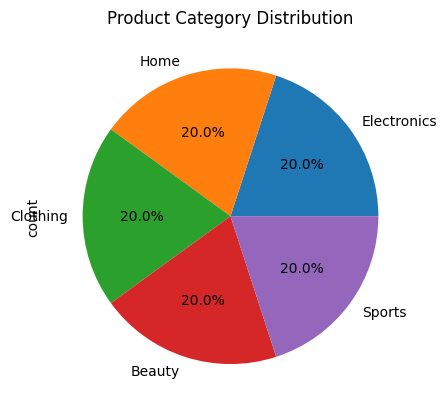

In [27]:
unified_data['ProductCategory'].value_counts().plot(kind='pie', autopct='%1.1f%%',title='Product Category Distribution')
plt.show()

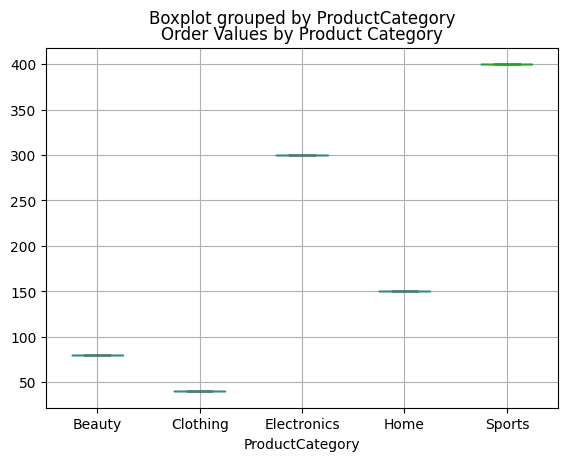

In [28]:
unified_data.boxplot(column='TotalSales', by='ProductCategory')
plt.title('Order Values by Product Category')
plt.show()